In [14]:
from ExpGSMM.experimental.ExpMatrix import ExpMatrix
from ExpGSMM.experimental.Biomass import Biomass
from ExpGSMM.stats.stats import StatisticalAnalysis
from ExpGSMM import DATA_PATH
import pandas as pd
from ExpGSMM.graphics.plot import boxplot, hist, qqplot

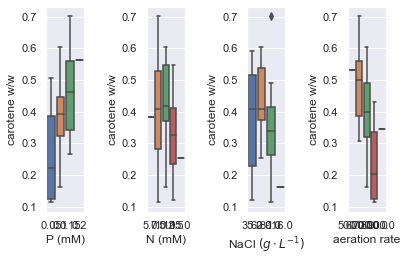

In [19]:
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)



boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'})

In [25]:
m.to_excel(f"{DATA_PATH}/experimental/boxplot.xlsx")